# 统计学

## 11.1 正态性检验

* 正态分布

正态分布是金融学中最重要的分布 ， 也是金融理论的主要统计学基础之一。尤其是下面这些金融理论基础 ， 在很大程度上依赖于股票市场收益的正态分布。

* 投资组合理论

当股票收益呈正态分布时，最优化投资组合可以在这样的环境中选择： 只有平均收益和收益的方差（或者波动率）以及不同股票之间的协方差与投资决策（即最优化投资组合构成）相关。

* 资本性资产定价模型

同样． 当股票收益呈正态分布时 ， 单独证券的价格可以很好地以和某种大规模市场指数的关系表示：这种关系通常用单一股票与市场指数的联动指标（ β）表示。

* 有效市场假设

有效市场指的是价格反映所有可用信息的市场 ， 其中的 “所有”可以是挟义的 ，也可以是广义的（例如 “所有公开信息”或者同时包括 “只为个人所有 ” 的信息）；如果这个假设成立 ， 股票价格波动将是随机的，而收益呈正态分布。

* 期权定价理论

布朗运动是随机股票（和其他证券）价格变动的标准、 基准模型：著名的 Black-Scholes-Merton 期权定价公式使用几何布朗运动作为股票在一段时间内随机波动的模型，这种波动造成收益呈正态分布。

### 11.1.1 基准案例

几何布朗运动中的路径特性：

* 正态对数收益率

* 在两点之间的对数收益率 :

$$ logS_t/S_s=logS_t−logS_s(0<s<t) $$

对数-正太价值
在任何时点 t>0 , 价值 S_t 呈正态分布

In [ ]:
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(1000)


# 为几何布朗运动生成蒙特卡洛路径
def gen_paths(S0, r, sigma, T, M, I):
    """
    Generates Monte Carlo paths for geometric Brownian motion.
    :param S0: initial stock/index value
    :param r: constant short rate
    :param sigma: constant volatility
    :param T: final time horizon
    :param M: number of time steps/intervals
    :param I: number of paths to be simulated
    :return:ndarray,shape(M+1,I)
    simulated paths given the parameters
    """
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

下面是蒙特卡洛模拟的一种可能的参数化， 和 gen_paths 函数相结合， 生成25万条路径，每条有 50 个时间步：

Text(0, 0.5, 'index level')

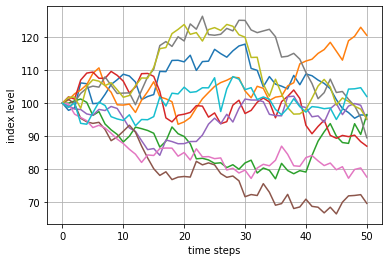

In [ ]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
paths = gen_paths(S0, r, sigma, T, M, I)

# 展示前10条模拟路径：
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')



我们主要感兴趣的是对数收益率的分布。

In [ ]:
# 成一个包含所有对数收益率的ndaray对象
log_returns = np.log(paths[1:] / paths[0:-1])
# 考虑50个时间步上的第一条模拟路径
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [ ]:
# 模拟路径的对数收益率序列可能采取如下形式：
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

这是人们在金融市场上可能经历的：在一些日子里你的投资获得正收益。而在其他日子里。相对于最近的财富状况， 你损失了金钱。

In [ ]:
def print_statistics(array):
    """
    Prints selected statistics
    :param array: object to generate statistic on
    :return: 
    """
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

print_statistics(log_returns.flatten())# log_returns.flatten() 返回一个一维数组

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


本例中的数据集包含 1250 万个数据点， 其值主要处于 -0.15 和 0.15 之间。 我们预期的（设置的参数）平均年化收益为 0.05， 标准差（波动率）为 0.2。数据集中的年化值不完全等于上述值，但是很接近（均值乘以 50 ， 标准差乘以 √50）。

比较模拟对数收益率的分布和参数化 r 和 sigma 之后的正态分布概率密度函数（pdf）

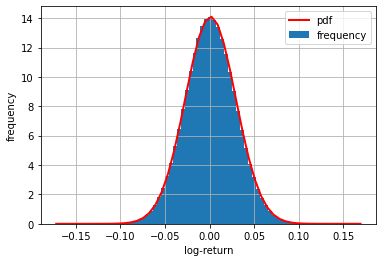

In [ ]:
plt.hist(log_returns.flatten(), bins=70, density=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)), 'r', lw=2.0, label='pdf')
plt.legend()

对比频率分布（直方图）与理论化 pdf 不是图形化 “检验” 正态性的唯一方法。所谓的分位数-分位数图,也很适合于这一任务：

Text(0, 0.5, 'sample quantiles')

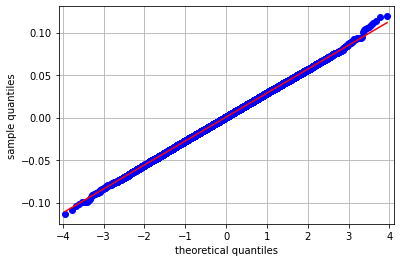

In [ ]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

尽管图形方法很有吸引力，但是它们通常无法代替更严格的测试过程：

* 偏斜度测试（skewtest）
    * 测试样本的偏斜是否“正态”（也就是值足够接近0）

* 峰度测试（kurtosistest）
    * 测试样本的峰度是否“正态”（也就是值足够接近0）

* 正态性测试（normaltest）
    * 结合其他两种测试方法，检验正态性



In [ ]:
def normality_tests(arr):
    """
    Tests for normality distribution of given data set
    :param arr: ndarray
    object to generate statistics on
    :return:
    """
    print("Skew of data set  %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Kurt test p-value %14.3f" % scs.normaltest(arr)[1])

normality_tests(log_returns.flatten())

Skew of data set           0.001
Skew test p-value          0.430
Kurt of data set           0.001
Kurt test p-value          0.541
Kurt test p-value          0.607


测试值表明， 对数收益率确实呈正态分布。

最后， 我们检查期末值是否确实呈正态分布。这也归结于正态性检验， 因为我们只需要应用对数函数转换数据（得到正态分布数据——也可能得不到）。



Text(0.5, 1.0, 'log data')

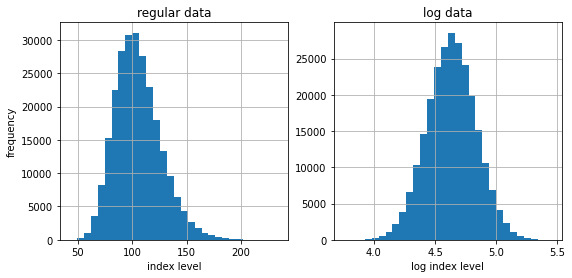

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [ ]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


数据集的统计数字和预期的表现一样，均值接近 105 ，标准（波动性）接近 20%

In [ ]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


对数指数水平的偏斜度和峰度也接近于0

In [ ]:
normality_tests(np.log(paths[-1]))

Skew of data set          -0.001
Skew test p-value          0.851
Kurt of data set          -0.003
Kurt test p-value          0.744
Kurt test p-value          0.931


这个数据集也展现了高的p值， 为正态分布假设提供了很强的支持

再次比较频率分布和正态分布的 pdf

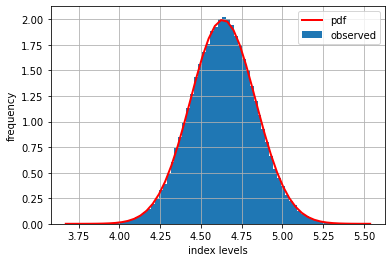

In [ ]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()), 'r', lw=2.0, label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

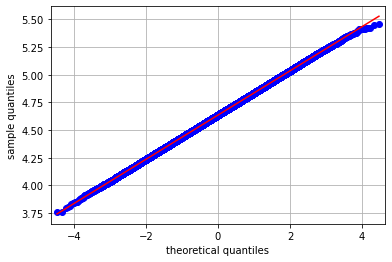

In [ ]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

### 11.1.2 现实世界的数据

> 从tushare中获取[上证指数，深证成指，中国卫星，中兵红箭]的数据

In [ ]:
import pandas as pd
import tushare as ts
import datetime

symbols = ['sh000001', '399001', '600118', '000519']
indexes = pd.date_range('2016-01-01', '2018-07-06')
# 为了保持和从toshare获取的时间序列类型一致，这里把时间类型转为字符串
indexes = indexes.map(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))

data = pd.DataFrame(index=indexes)
for sym in symbols:
    k_d = ts.get_k_data(sym, '2016-01-01', ktype='D')
    # 如果上面的时间序列不转成字符串，这里就要转成时间序列，以保持index类型一致
    # k_d['date'] = k_d['date'].astype('datetime64[ns]')
    k_d.set_index('date', inplace=True)
    data[sym] = k_d['close']
data = data.dropna()

data.info()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, 2016-01-04 to 2018-07-06
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sh000001  605 non-null    float64
 1   399001    605 non-null    float64
 2   600118    605 non-null    float64
 3   000519    605 non-null    float64
dtypes: float64(4)
memory usage: 23.6+ KB


In [ ]:
print(data.head())

            sh000001    399001  600118  000519
2016-01-04   3296.66  11630.93  38.935   16.16
2016-01-05   3287.71  11468.06  39.843   17.45
2016-01-06   3361.84  11724.88  40.702   19.20
2016-01-07   3125.00  10760.27  36.823   17.28
2016-01-08   3186.41  10888.91  36.044   17.24


直接比较4个时间序列，但是规范化为起始值100

/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

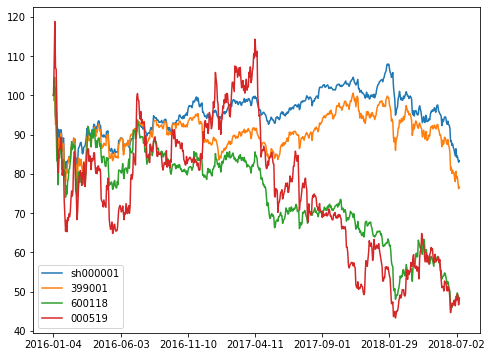

In [ ]:
(data / data.iloc[0] * 100).plot(figsize=(8, 6))

* 计算对数收益率

In [ ]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,sh000001,399001,600118,000519
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.002719,-0.014102,0.023053,0.076801
2016-01-06,0.022297,0.022147,0.021331,0.095571
2016-01-07,-0.073054,-0.085852,-0.100155,-0.105361
2016-01-08,0.019461,0.011884,-0.021382,-0.002317


array([[<AxesSubplot:title={'center':'000519'}>,
        <AxesSubplot:title={'center':'399001'}>],
       [<AxesSubplot:title={'center':'600118'}>,
        <AxesSubplot:title={'center':'sh000001'}>]], dtype=object)

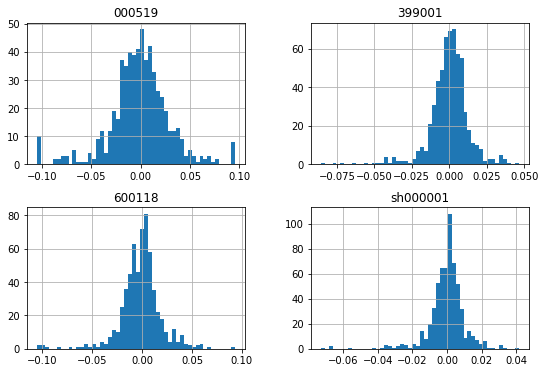

In [ ]:
log_returns.hist(bins=50, figsize=(9, 6))

下一步考虑时间序列数据集的不同统计数字：

In [ ]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol sh000001
------------------------------
     statistic           value
------------------------------
          size       604.00000
           min        -0.07305
           max         0.04174
          mean        -0.00030
           std         0.01077
          skew        -1.65159
      kurtosis         9.99414

Results for symbol 399001
------------------------------
     statistic           value
------------------------------
          size       604.00000
           min        -0.08585
           max         0.04657
          mean        -0.00044
           std         0.01390
          skew        -1.29898
      kurtosis         6.60328

Results for symbol 600118
------------------------------
     statistic           value
------------------------------
          size       604.00000
           min        -0.10545
           max         0.09333
          mean        -0.00120
           std         0.02069
          skew        -0.75624
      kurtosis    

峰度值在所有4个数据集上都与正态分布的要求相去甚远。

Text(0, 0.5, 'sample quantiles')

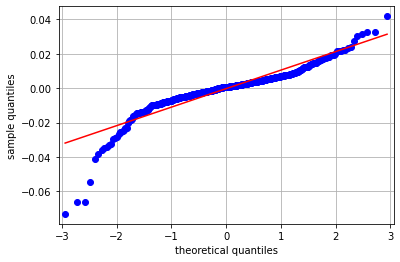

In [ ]:
# 通过 qq 图检查 sh000001 的数据
sm.qqplot(log_returns['sh000001'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

很显然，样本的分位数值不在一条直线上， 表明 “非正态性”。在左侧和右侧分别有许多值远低于和远高于直线。换言之，这一时间序列信息展现出 “大尾巴” （Fat tails） 。大尾巴一词指的是（频率）分布中观察到的正负异常值远多于正态分布应有表现的情况。



* 中国卫星 对数收益率分位数-分位数图

Text(0, 0.5, 'sample quantiles')

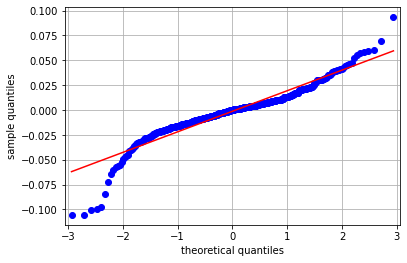

In [ ]:
sm.qqplot(log_returns['600118'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

从中国卫星股票的数据，可以得出相同的结论 ， 分布中也有明显的 “大尾巴 ” 现象。



最后用上述结果进行正式的正态性检验：

In [ ]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)



Results for symbol sh000001
------------------------------
Skew of data set          -1.652
Skew test p-value          0.000
Kurt of data set           9.994
Kurt test p-value          0.000
Kurt test p-value          0.000

Results for symbol 399001
------------------------------
Skew of data set          -1.299
Skew test p-value          0.000
Kurt of data set           6.603
Kurt test p-value          0.000
Kurt test p-value          0.000

Results for symbol 600118
------------------------------
Skew of data set          -0.756
Skew test p-value          0.000
Kurt of data set           5.640
Kurt test p-value          0.000
Kurt test p-value          0.000

Results for symbol 000519
------------------------------
Skew of data set          -0.309
Skew test p-value          0.002
Kurt of data set           2.342
Kurt test p-value          0.000
Kurt test p-value          0.000


## 11.2 投资组合优化

现代 / 均值-方差投资组合理论（MPT）是金融理论的重要基础。正态分布收益率假设是该理论的基础：

只观察均值和方差， 我们必然假定没有必要用其他统计数字描述期末财富的分布。除非投资者有特殊的效用函数（二次效用函数）， 否则有必要假设收益率呈正态分布， 用均值和方差就可以完整地描述。

### 11.2.1 数据

我们选择 5 种不同资产以提供分析：军工类股票 中国卫星 （600118）、中兵红箭 （000519） 、航天动力 （600343） ，以及浦发银行（600000 ）和 中证500指数基金 500ETF （510500 ）。

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

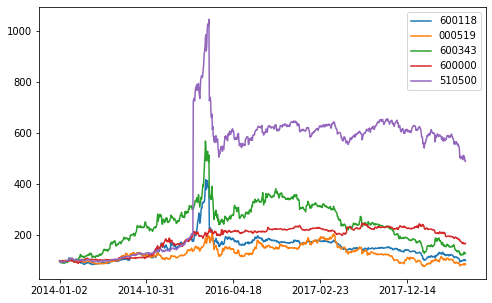

In [ ]:
import numpy as np
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt

# 军工类股票 中国卫星 （600118）、中兵红箭 （000519） 、航天动力 （600343） ，
# 以及浦发银行（600000 ）和 中证500指数基金 500ETF （510500 ）
symbols = ['600118', '000519', '600343', '600000', '510500']

indexes = pd.date_range('2014-01-01', '2018-07-06')
# 为了保持和从toshare获取的时间序列类型一致，这里把时间类型转为字符串
indexes = indexes.map(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))

data = pd.DataFrame(index=indexes)
for sym in symbols:
    k_d = ts.get_k_data(sym, '2014-01-01', ktype='D')
    # 如果上面的时间序列不转成字符串，这里就要转成时间序列，以保持index类型一致
    # k_d['date'] = k_d['date'].astype('datetime64[ns]')
    k_d.set_index('date', inplace=True)
    data[sym] = k_d['close']
data = data.dropna()

(data / data.iloc[0] * 100).plot(figsize=(8, 5))

In [ ]:
# 均值-方差指的是不同证券（对数）收益的均值和方差, 可以这样计算:
rets = np.log(data / data.shift(1))
# 在这些时间序列数据中， 可以看到年化收益表现的显著差异。
# 我们使用 252 个交易日，从每日收益得出年化收益：
rets.mean() * 252
# 600118    0.006067
# 000519   -0.038631
# 600343    0.068651
# 600000    0.140085
# 510500    0.428569
# dtype: float64

# 投资资产的协方差矩阵是整个投资组合选择过程的核心部分
rets.cov()*252
#           600118    000519    600343    600000    510500
# 600118  0.237557  0.107797  0.177612  0.017609  0.102007
# 000519  0.107797  0.209140  0.123730  0.012978  0.062838
# 600343  0.177612  0.123730  0.238805  0.013859  0.095337
# 600000  0.017609  0.012978  0.013859  0.064694  0.022098
# 510500  0.102007  0.062838  0.095337  0.022098  0.510833

,600118,000519,600343,600000,510500
600118,0.237544,0.107789,0.177607,0.017604,0.102006
000519,0.107789,0.209140,0.123730,0.012973,0.062838
600343,0.177607,0.123730,0.238805,0.013850,0.095337
600000,0.017604,0.012973,0.013850,0.064721,0.022130
510500,0.102006,0.062838,0.095337,0.022130,0.510833


### 11.2.2 基本理论

下面，我们假定投资者不允许在某种证券上建立空头头寸。 只允许多头头寸意味着投资者的财富将在可用资产中分配。所有头寸均为多头（正）头寸，且头寸的总和为 100%。例如， 可以在 5 种证券中投入相同的资金量（每种 20%）。



In [ ]:
# 生成 5 个 0 到 1之间的随机数， 
# 然后对这些数值进行规范化，使所有值的总和为1
noa = 5
weights = np.random.random(noa)
weights /= np.sum(weights)
weights
# array([ 0.21076189,  0.23917961,  0.1825734 ,  0.03619006,  0.33129504])

array([0.0346395 , 0.02726489, 0.2868883 , 0.10396806, 0.54723926])

现在可以检查资产权重综合确实为1 ；也就是说∑Iwi=1， 其中 I 是资产的数量，wi≥0 是资产的权重。 下面公式提供在给定单一证券权重情况下的预期投资组合收益。 这是假定历史平均表现是未来（预期）表现的最佳预测因素时的预期投资收益公式。公式中，ri 是状态相关未来收益（由假定为正态分布的收益值组成的向量）， 而 μi 是证券i的预期收益。 最后， WT 是权重向量的转置，μ是预期证券收益的向量。

In [ ]:
# 预期投资组合方差
np.dot(weights.T, np.dot(rets.cov() * 252, weights))
# 0.14184053722017648

# 预期投资组合标准差
#（预期）投资组合标准差（波动率）只需要计算一次平方根即可得到
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
# 0.37661722905381861

0.4676175863011169

投资者最感兴趣的是给定证券组合的风险-收益均衡性及其统计学特性。为此．我们实施一次蒙特卡洛模拟，生成较大规模的随机投资组合权重向量。对于每一种模拟的分配，我们记录得出的预期投资组合收益和方差：

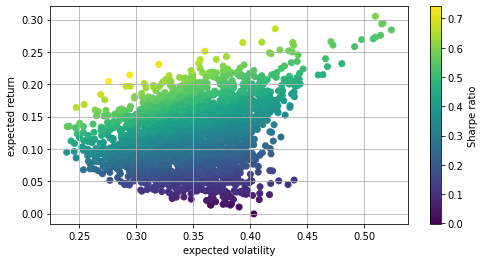

In [ ]:
prets = []
pvols = []
for p in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### 11.2.3 投资组合优化

UsageError: Line magic function `%%time` not found.


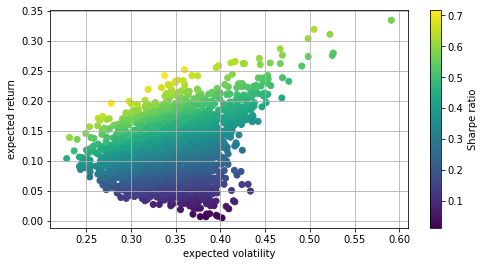

In [ ]:
# 生成 5 个 0 到 1之间的随机数，
# 然后对这些数值进行规范化，使所有值的总和为1
noa = 5
weights = np.random.random(noa)
weights /= np.sum(weights)
weights
# array([ 0.21076189,  0.23917961,  0.1825734 ,  0.03619006,  0.33129504])

# 预期投资组合方差
np.dot(weights.T, np.dot(rets.cov() * 252, weights))
# 0.14184053722017648

# 预期投资组合标准差
# （预期）投资组合标准差（波动率）只需要计算一次平方根即可得到
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
# 0.37661722905381861

prets = []
pvols = []
for p in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')


# 11.2.3 投资组合优化
# 首先建立一个方便的函数，为输入的权重向量 / 数组给出重要的投资组合统计数字：
def statistics(weights):
    """
    Return portfolio statistics
    :param weights: weights for different securities in portfolio
    :return:
    pret:float
    expected portfolio return
    pvol:float
    expected portfolio volatility
    pret/pvol:float
    Sharpe ratio for rf=0
    """
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])


# 最优化投资组合的推导是一个约束最优化问题
import scipy.optimize as sco


# 最小化函数minimize很通用，考虑了参数的（不）等式约束和参数的范围。
# 我们从夏普指数的最大化开始。 正式地说，最小化夏普指数的负值：
def min_func_sharpe(weights):
    return -statistics(weights)[2]


# 约束是所有参数（权重）的总和为1。 这可以用minimize函数的约定表达如下
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# 我们还将参数值（权重）限制在0和l之间。 这些值以多个元组组成的一个元组形式提供给最小化函数：
bnds = tuple((0, 1) for x in range(noa))

# 优化函数调用中忽略的唯一输入是起始参数列表（对权重的初始猜测）。我们简单地使用平均分布：
noa * [1. / noa, ]
# [0.2, 0.2, 0.2, 0.2, 0.2]

%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa, ], method='SLSQP', bounds=bnds, constraints=cons)
# Wall time: 1.2 s

opts
# fun: -0.7689821435140733
# jac: array([3.62539694e-01, 3.84121098e-01, 1.03567891e-01,
#             -1.06185675e-04, 2.67580152e-04])
# message: 'Optimization terminated successfully.'
# nfev: 59
# nit: 8
# njev: 8
# status: 0
# success: True
# x: array([2.69140628e-17, 5.93820112e-17, 0.00000000e+00,
#           7.15876612e-01, 2.84123388e-01])

opts['x'].round(3)
# array([ 0.   ,  0.   ,  0.   ,  0.716,  0.284])

# 最优化工作得出 一个投资组合，仅由5种资产中的2种组成

# 使用优化中得到的投资组合权重， 得出如下统计数字
statistics(opts['x'].round(3))
# array([ 0.22201418,  0.28871174,  0.76898216])
# 预期收益率约为22.2%. 预期被动率约为28.9%， 得到的最优夏普指数为0.77

# 接下来， 我们最小化投资组合的方差。
# 这与被动率的最小化相同，我们定义一个函数对方差进行最小化：
def min_func_variance(weights):
    return statistics(weights)[1]**2

optv = sco.minimize(min_func_variance, noa * [1. / noa, ], method='SLSQP', bounds=bnds, constraints=cons)
optv
# fun: 0.05137907199877911
# jac: array([0.10326265, 0.10273764, 0.10269385, 0.10276436, 0.102121])
# message: 'Optimization terminated successfully.'
# nfev: 71
# nit: 10
# njev: 10
# status: 0
# success: True
# x: array([0.04526382, 0.1335909, 0.05702634, 0.73177776, 0.03234118])

optv['x'].round(3)
# array([ 0.045,  0.134,  0.057,  0.732,  0.032])
# 投资组合中加入了全部资产。 这种组合可以得到绝对值最小方差投资组合
# 得到的预期收益率、波动率和夏普指数如下：
statistics(optv['x']).round(3)
# array([ 0.115,  0.227,  0.509])

### 11.2.4 有效边界

所有最优化投资组合——即目标收益率水平下波动率最小的所有投资者（或者给定风险水平下收益率最大的所有投资组合）——的求取都和上述最优化过程类似。 唯一的区别是我们必须循环使用多种起始条件。 最优化采用两种条件： 一是目标收益率水平tret ， 另一个和以前一样是投资组合权重的总和。每个参数的边界值保持不变：



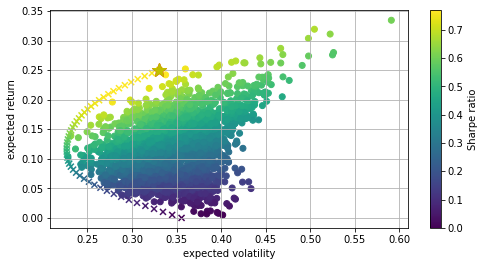

In [ ]:
def min_func_port(weights):
    return statistics(weights)[1]
    
def min_func_variance(weights):
    return statistics(weights)[1]**2

opts = sco.minimize(min_func_sharpe, noa * [1. / noa, ], method='SLSQP', bounds=bnds, constraints=cons)
optv = sco.minimize(min_func_variance, noa * [1. / noa, ], method='SLSQP', bounds=bnds, constraints=cons)


# 在不同目标收益率水平（ trets ）中循环时。 最小化的一个条件会变化。
# 这就是每次循环中更新条件字典对象的原因：

trets = np.linspace(0.0, 0.25, 50)
tvols = []
bnds = tuple((0, 1) for x in weights)
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa, ], method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

plt.figure(figsize=(8,4))
# random portfolio composition
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
# efficient frontier
plt.scatter(tvols,trets,c=trets/tvols,marker='x')
# portfolio with highest Sharpe ratio
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0],'r*',markersize=15.0)
# minimum variance portfolio
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0],'y*',markersize=15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

上图展示了最优化的结果。交叉表示给定某个目标收益率的最优投资组合：小点和以前一样表示随机组合。此外， 该图还展示了两个较大的星号： 一个表示最小波动率 / 方差投资组合（最左侧的组合）， 另一个表示具有最大夏普指数的投资组合。

有效边界由所有收益率高于绝对最小方差投资组合的最优投资组合构成。 这些投资组合在给定某一风险水平的预期收益率上优于其他所有投资组合。



### 11.2.5 资本市场线

除了股票等高风险证券或者商品（如黄金）之外， 通常有一种普遍的无风险投资机会：现金或者现金账户。在理想化的世界中， 保存在大银行现金账户中的资金可以认为是无风险的（例如， 通过公共存款保险计划）。这种无风险投资的缺点是通常只能得到很低的收益。有时接近于0。

然而， 考虑这些无风险资产， 可以显著加强投资者的有效投资机会。 基本思路是， 投资者首先确定高风险资产的一个有效组合， 然后在组合中加人无风险资产。 通过调整投资于无风险资产中的财富比例，有可能实现任何风险-收益均衡性，这些配置位于（风
险-收益空间中）无风险资产和有效投资组合之间的直线上。

（在许多选项中）使用哪一个有效投资组合进行最优化风格的投资？这是有效边界切线恰好通过无风险投资组合风险-收益点的投资组合。 例如， 考虑无风险利率rf=0.01 的情况。我们寻找有效边界上切线穿过风险-收益空间上的点(σf,rf)=(0,1) 的投资组合。

In [ ]:
import scipy.interpolate as sci

ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

tck = sci.splrep(evols, erets)

# 通过这条数值化路径，最终可以为有效边界定义一个连续可微函数
# 和对应的一阶导数函数df(x):

def f(x):
    """
    Efficient frontier function (splines approximation)
    :param x:
    :return:
    """
    return sci.splev(x, tck, der=0)


def df(x):
    """
    First derivative of efficient frontier function.
    :param x:
    :return:
    """
    return sci.splev(x, tck, der=1)

我们所寻求的是函数 t(x) = a+b*x ， 描述穿过风险-收益空间中无风险资产、与有效边界相切的一条直线。

In [ ]:
# 定义一个函数，返回给定参数集p=(a,b,x)
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1]-df(p[2])
    return eq1,eq2,eq3

# 数值优化得到如下的值
opt=sco.fsolve(equations,[0.01,0.5,0.15])
print(opt)

[0.01       0.7345645  0.29391467]


正如预期，有 a=rf=0.01

优化的成败可能取决于初始参数化， 因此必须小心选择这些参数——常需要组合合理的猜测， 并反复尝试。

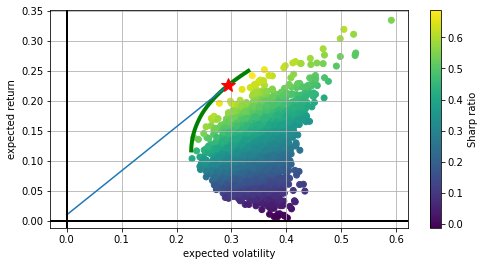

In [ ]:
plt.figure(figsize=(8, 4))
# random portfolio composition
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols, marker="o")
# efficient frontier
plt.plot(evols, erets, 'g', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
# capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='-', lw=2.0)
plt.axvline(0, color='k', ls='-', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharp ratio')

星号代表有效边界中切线穿过无风险资产点（0, 0.01）的最优化投资组合。这个最优化组合的预期波动率为29.4% （opt[2]）， 预期收益率为22.6% （f(opt[2])）

最优投资组合的权重如下，只包含5种资产中的 3 种：

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa, ],
                   method='SLSQP', bounds=bnds, constraints=cons)
res['x'].round(3)

array([0.   , 0.   , 0.   , 0.703, 0.297])

## 11.3 主成分分析

主成分分析 （PCA）已经成为金融学中的流行工具。 维基百科，对这种技术的定义如下：
主成分分析（PCA）是一种统计过程， 使用正交转换将一组可能相关的变量观测值转换为一组线性无关的变量（主成分）。主成分的数量少于或者等于原始变量数量。这种转换的定义方式是，第一个主成分有最大的可能方差（也就是， 考虑数据中尽可能多的易变性）， 后续的每个成分在正支（即无关）于前面的成分的条件下， 具备最大的可能方差。

例如， 考虑一个股票指数， 如30种不同股票构成的德国DAX指数。 所有股票价格的变动共同决定指数的变动（通过某种有根据的公式）。此外， 单独股票价格的变动通常是相关的， 例如， 由于总体经济状况或者某一领域的一些发展。

对于统计学应用 ，通常难以使用30种相关因素解释某种股票指数的变动。这就是 PCA 发挥作用的地方。 它得出单独的不相关 “成分” ，这些成分 “很适合” 解释股票指数的变动。 人们可以将这些成分视为指数中选择股票的线性组合（即投资组合），不用处理30种关联的指数成分，而可以处理5个、3个甚至只有1个主成分。

### 11.3.1 DAX指数和30种成分股（这里用 上证50指数和成份股）

In [3]:
import tushare as ts

# 上证50成分股
pro = ts.pro_api('f776d662996acc310f45c9e77121595979e6208b5594be46119c680e')

df = pro.index_weight(index_code='399300.SZ', start_date='20180901', end_date='20180930')

Exception: 抱歉，您没有访问该接口的权限，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。

In [ ]:
import tushare as ts

# 上证50成分股
symbol = ts.get_sz50s()
print(symbol)

symbols = []
for i in symbol:
    symbols.append(i)
# ['600000','600016','600019','600028','600029','600030','600036','600048','600050','600104','600111','600276','600309','600340','600519','600547','600585','600606','600690','600703','600887','600958','600999','601006','601088','601166','601169','601186','601211','601229','601288','601318','601328','601336','601360','601390','601398','601601','601628','601668','601688','601766','601800','601818','601857','601878','601881','601988','601989','603993']
symbols.append('sh000016') # 加上 上证50指数


indexes = pd.date_range('2014-01-01', '2018-07-06',freq='B')
# 为了保持和从toshare获取的时间序列类型一致，这里把时间类型转为字符串
indexes = indexes.map(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))

data = pd.DataFrame(index=indexes)
for sym in symbols:
    k_d = ts.get_k_data(sym, '2014-01-01', ktype='D')
    # 如果上面的时间序列不转成字符串，这里就要转成时间序列，以保持index类型一致
    # k_d['date'] = k_d['date'].astype('datetime64[ns]')
    k_d.set_index('date', inplace=True)
    k_d = k_d.dropna()
    data[sym] = k_d['close']
data1 = data.ffill()
data1.info()

read_excel() got an unexpected keyword argument `parse_cols`
None


TypeError: 'NoneType' object is not iterable

In [ ]:
# 删除掉赋前值后非空数据个数<1000 的数据
data1.drop(['600958','601211','601229','601878','601881'], axis=1, inplace=True)

data2=data1.dropna()
data2.info()
# 经常需要指数数据，将其分离
sh50=pd.DataFrame(data.pop('sh000016'))

data2[data.columns[:6]].head()

### 11.3.2 应用PCA

In [4]:
scale_function = lambda x: (x - x.mean()) / x.std()

from sklearn.decomposition import KernelPCA

pca = KernelPCA().fit(data.apply(scale_function))

# 每成分的重要性（或解释功效）由特征值表示。特征值可以在KernelPCA对象的属性中找到
len(pca.lambdas_)
# 579
# 这样的分析给出了太多的成分


# 我们只观察前10个成分
pca.lambdas_[:10].round()
# array([ 31679.,  10076.,   3517.,   1192.,    993.,    619.,    513.,
#           331.,    280.,    186.])
# 第10种成分的影响已经几乎可以忽略不计

# 每种成分的相对重要性
get_we = lambda x: x / x.sum()
get_we(pca.lambdas_)[:10]
# array([ 0.62687955,  0.19939252,  0.06959768,  0.02359732,  0.01964601,
#         0.01224315,  0.01014616,  0.00654794,  0.00553158,  0.00368011])
# 第一个成分可以解释45种（50种删了5种）时间序列中易变性的60%。
get_we(pca.lambdas_)[:6].sum()
# 0.95135621471186538
# 前6种成分解释易变性的大约95%。

NameError: name 'data' is not defined

### 11.3.3 构造PCA指数


上证50指数和包含一个成分的PCA指数

In [ ]:
# 建立一个只包含第一个成分的PCA指数
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
sh50['PCA_1']=pca.transform(-data) # 当参数为data时画出的图是负相关，所以加个负号

sh50.apply(scale_function).plot(figsize=(8,4))

上证50指数和包含1种和5种成分的PCA指数

In [ ]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components=pca.transform(data)# 当参数为-data时画出的图是负相关，所以不加负号
weights=get_we(pca.lambdas_)
sh50['PCA_5']=np.dot(pca_components,weights)
sh50.apply(scale_function).plot(figsize=(8,4))

以不同的方式检查上证50指数和PCA指数之间的关系——通过散点图，在组合中加人日期信息：

用线性回归对比 上证50指数 收益率值与 PCA 收益率值

In [ ]:
# 将DataFrame对象的DatetimeIndex转换为matplotlib兼容的格式
import matplotlib as mpl
data.index = data.index.astype('datetime64[ns]')
pydatetimes = [i.to_pydatetime() for i in data.index ]
mpl_dates = mpl.dates.date2num(pydatetimes)

# 这个新的日期列表可以用于散点图， 通过不同颜色强调每个数据点的日期
plt.figure(figsize=(8,4))
plt.scatter(sh50['PCA_5'],sh50['sh000016'],c=mpl_dates)
lin_reg=np.polyval(np.polyfit(sh50['PCA_5'],sh50['sh000016'],1),sh50['PCA_5'])
plt.plot(sh50['PCA_5'],lin_reg,'r',lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('sh000016')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),format=mpl.dates.DateFormatter('%d %b %y'))

图中揭示了2014-2015年存在结构晰裂。如果PCA指数完美地复制上证50指数，我们就可以预期所有数据点在一条直线上， 并且看到回归线穿越这些点。
完美是难以达到的，但是我们可以做得更好。为此， 我们将整个时间轴分为两段子时期。 然后， 我们可以实施一次早期回归和一次晚期回归：

用早期回归和晚期回归（机制转换）对比上证50指数值和PCA指数值

In [ ]:
cut_date = '2016-01-28'
early_pca = sh50[sh50.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca, sh50['sh000016'][sh50.index < cut_date], 1), early_pca)
late_pca = sh50[sh50.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca, sh50['sh000016'][sh50.index >= cut_date], 1), late_pca)

plt.figure(figsize=(8, 4))
plt.scatter(sh50['PCA_5'], sh50['sh000016'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('sh000016')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250), format=mpl.dates.DateFormatter('%d %b %y'))